In [194]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cmo
from datetime import datetime, timedelta

In [195]:
# path to model output
path_data = '../../data/modeloutput/'

In [196]:
dt = 1                      # timestep in days
t_start = 30*10+1           # initialization Julian day (August 15) - 30-day months /CL

In [197]:
dz = 2

In [198]:
# read values
HICE = np.loadtxt(path_data+'HICE.txt',delimiter=',')
HSNO = np.loadtxt(path_data+'HSNO.txt',delimiter=',')
T = np.loadtxt(path_data+'T.txt',delimiter=',')
S = np.loadtxt(path_data+'S.txt',delimiter=',')

In [199]:
# create time array
time = np.arange(0, len(T), dt)+t_start

timestring = [f'{2022+np.floor(d/360):4.0f}-{np.floor((((d%360)+30)/30)%12+1):02.0f}-{np.floor((d-1)%30)+1:02.0f}' for d in time]

# create depth array
z = np.arange(0, len(T[0])*dz, dz)

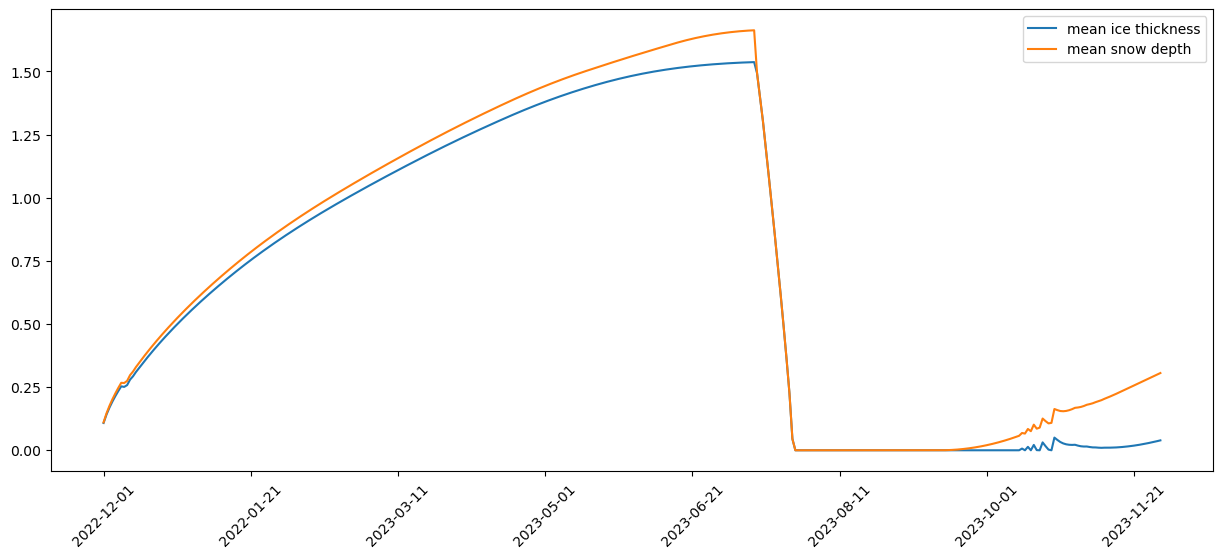

In [200]:
# plot time series of mean ice thickness and mean snow depth
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.plot(HICE, label='mean ice thickness')
ax.plot(HICE+HSNO, label = 'mean snow depth')

iticks = np.arange(0,len(time),50)

ax.set_xticks(iticks, labels=[timestring[i] for i in iticks], rotation = 45)
#ax.set_xticks([time[i] for i in iticks], labels=[timestring[i] for i in iticks], rotation = 45)

ax.legend()

Text(0.5, 0, 'Date')

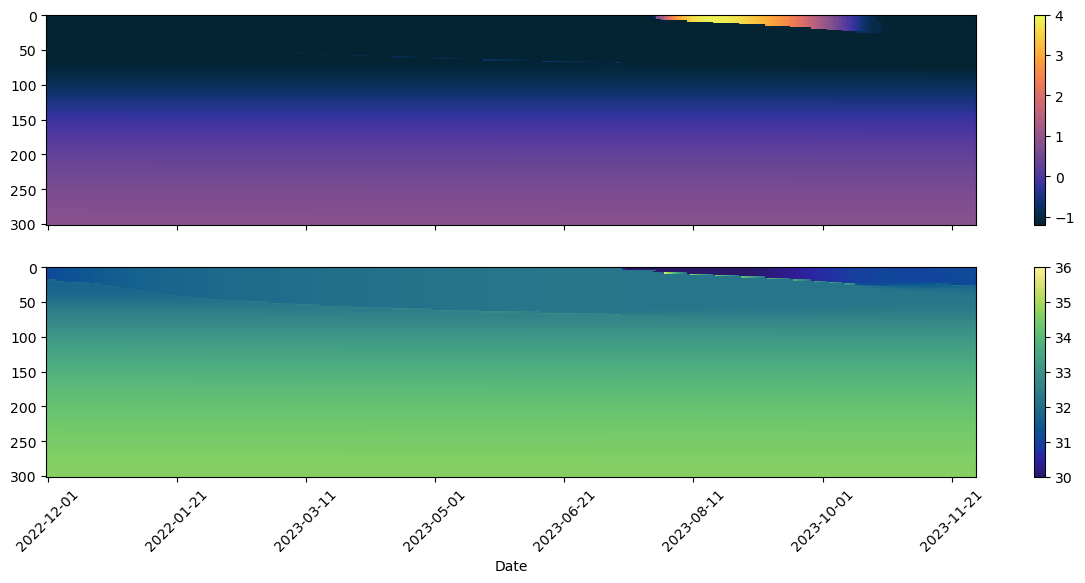

In [203]:
# plot ocean profiles
fig, [axT, axS] = plt.subplots(2,1, sharex=True, sharey=True, figsize=(15,6))

axT.invert_yaxis()
imT = axT.pcolormesh(np.arange(len(time)), z, T.T, cmap='cmo.thermal',
                     vmin = -1.2,
                     vmax = 4
                    )
imS = axS.pcolormesh(np.arange(len(time)), z, S.T, cmap='cmo.haline',
                     vmin = 30,
                     vmax = 36
                     )

fig.colorbar(imT, ax=axT)
fig.colorbar(imS, ax=axS)

axS.set_xticks(iticks, labels=[timestring[i] for i in iticks], rotation = 45);

axS.set_xlabel('Date')